In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
# create the model
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 13s 32ms/step - loss: 0.2534 - accuracy: 0.9281 - val_loss: 0.0967 - val_accuracy: 0.9733
Epoch 2/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0765 - accuracy: 0.9772 - val_loss: 0.0657 - val_accuracy: 0.9806
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0502 - accuracy: 0.9854 - val_loss: 0.0526 - val_accuracy: 0.9851
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0497 - val_accuracy: 0.9854
Epoch 5/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0275 - accuracy: 0.9916 - val_loss: 0.0518 - val_accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 7/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0150 - accuracy: 0.9956 - val_loss: 0.0510 - val_accuracy:

In [5]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9857
Test accuracy: 0.9857000112533569


In [6]:
# get predicted probabilities for each class
y_pred_proba = model.predict(x_test)

# compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 10
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# compute macro-average ROC curve and AUC
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(num_classes):
    tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= num_classes
roc_auc_macro = auc(fpr_macro, tpr_macro)

313/313 [==============================] - 1s 2ms/step


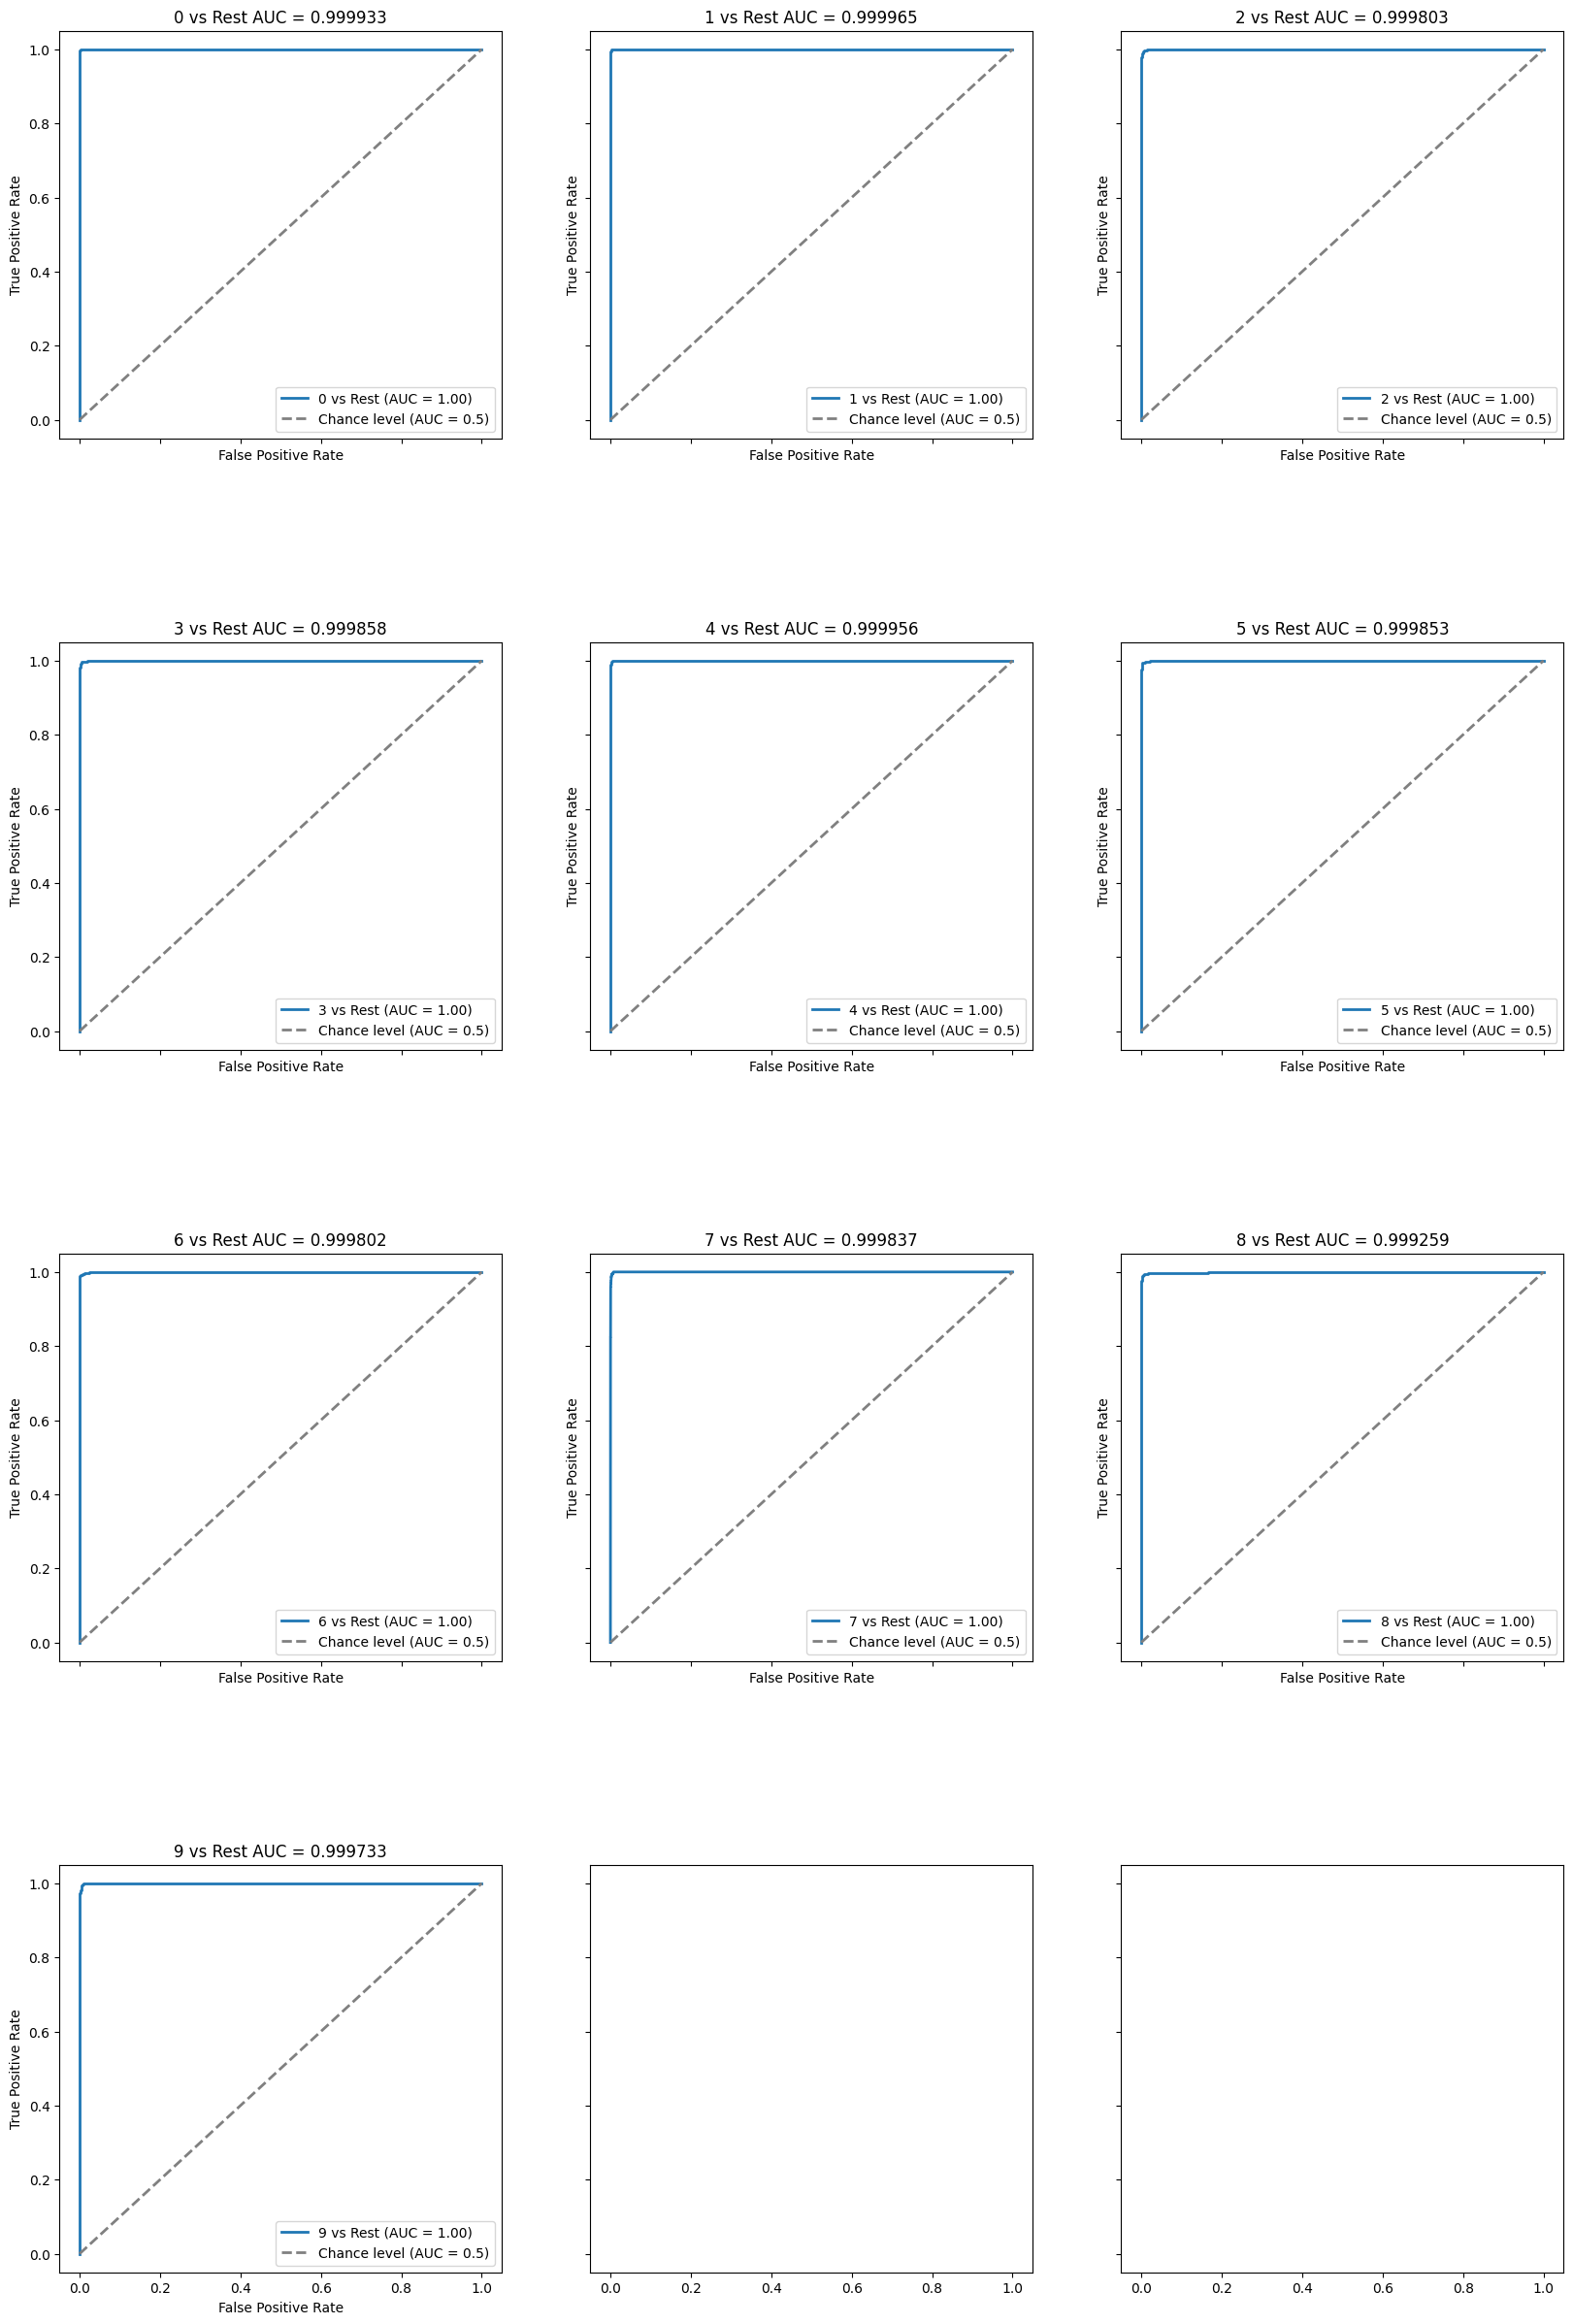

In [7]:
# Plot ROC curves for each digit
fig, axs = plt.subplots(4, 3, figsize=(20, 30), sharex=True, sharey=True, gridspec_kw={'hspace': 0.5})
axs = axs.flatten()

for i in range(10):
    fpr, tpr, thresholds = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    axs[i].plot(fpr, tpr, lw=2, label='%d vs Rest (AUC = %0.2f)' % (i, roc_auc) % roc_auc)
    axs[i].plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Chance level (AUC = 0.5)')
    axs[i].set_xlim([-0.05, 1.05])
    axs[i].set_ylim([-0.05, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title('%d vs Rest AUC = %f' % (i, roc_auc))
    axs[i].legend(loc="lower right")
plt.show()